In [1]:
using PyCall
# to install the ucimlrepo python package run the following command
# run(`$(PyCall.python) -m pip install  ucimlrepo`)

In [2]:
# adapted from  https://archive.ics.uci.edu/dataset/63/lymphography
uci = pyimport("ucimlrepo")
lymphography = uci.fetch_ucirepo(id=63) 

Dict{Any, Any} with 3 entries:
  "variables" => PyObject                name     role         type  ... descri…
  "data"      => Dict{Any, Any}("headers"=>PyObject Index(['class', 'lymphatics…
  "metadata"  => Dict{Any, Any}("demographics"=>Any[], "missing_values_symbol"=…

In [3]:
lymphography["variables"]

,name,role,type,demographic,description,units,missing_values
0,class,Target,Integer,None,None,None,no
1,lymphatics,Feature,Integer,None,None,None,no
2,block of affere,Feature,Integer,None,None,None,no
3,bl. of lymph. c,Feature,Integer,None,None,None,no
4,bl. of lymph. s,Feature,Integer,None,None,None,no
5,by pass,Feature,Integer,None,None,None,no
6,extravasates,Feature,Integer,None,None,None,no
7,regeneration of,Feature,Integer,None,None,None,no
8,early uptake in,Feature,Integer,None,None,None,no
9,lym.nodes dimin,Feature,Integer,None,None,None,no


In [4]:
X = lymphography["data"]["features"]

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,4,2,1,1,1,1,1,2,1,2,2,2,4,4,1,1,2,2,NaN
1,3,2,1,1,2,2,1,2,1,3,3,2,3,3,2,2,2,2,NaN
2,3,2,2,2,2,2,2,2,1,4,3,3,4,4,3,2,2,7,NaN
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6,NaN
4,3,1,1,1,1,1,1,1,1,2,2,4,3,3,1,2,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,2,1,1,2,2,1,2,1,2,2,4,3,3,2,2,2,4,NaN
144,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,NaN
145,2,2,1,1,1,2,1,2,1,3,3,3,3,3,3,2,2,4,NaN
146,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1,NaN


In [5]:
Y = lymphography["data"]["targets"]

,class
0,3
1,2
2,3
3,3
4,2
...,...
143,3
144,2
145,3
146,2


In [121]:
using Plots,LaTeXStrings,JLD2,Base.Threads 
include("mpsforecast.jl")

In [7]:
# use the "lymphatics" data and subtract 1 to start from 0
data = convert(Vector{Int},X.lymphatics) .- 1
past = data[1:138]
future = data[139:end]

forecast(model) = prob(model,future,memory(model,past));

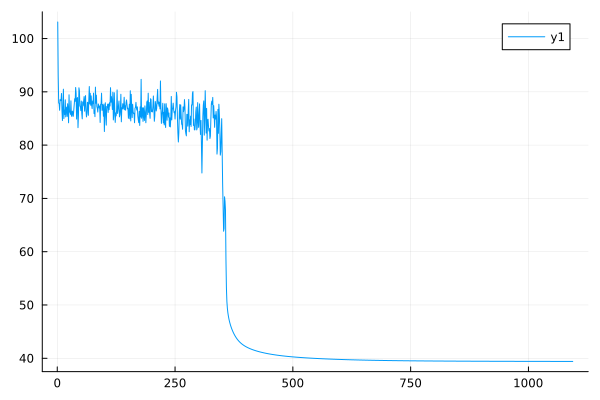

In [116]:
q, ll = fitquantum(16,data; η=1e-1,c=0.995,maxiter=10000)
plot(ll)

In [126]:
function qsim(dim, n; args...)
    r = zeros(n)
    Threads.@threads for i=1:n
        q, _ = fitquantum(dim,data; args...)
        r[i] = forecast(q)
    end
    r
end

function csim(dim, n )
    r = zeros(n)
    Threads.@threads for i=1:n
        c = fitclassical(dim,data)
        r[i] = forecast(c)
    end
    r
end
;

In [127]:
q16 = qsim(16, 100; η=1e-1,c=0.995, maxiter=10000)

100-element Vector{Float64}:
 0.02183005855220619
 0.026271872035220512
 0.02206551643959368
 0.022708577979291305
 0.02327759040850822
 0.025110840833711012
 0.026628367869379676
 0.03418097923629032
 0.030505194785583938
 0.0267190111489772
 0.02045307285075123
 0.017091556192899746
 0.029765994366219354
 ⋮
 0.028944911716678352
 0.02334801143995968
 0.02638815693474475
 0.02898990169361529
 0.024977016320174943
 0.022731874165244213
 0.023725882283559693
 0.024974689212875337
 0.028487087850721578
 0.028997724264914766
 0.01955512978343996
 0.024243341534996427

In [128]:
c16 = csim(16,100)

100-element Vector{Float64}:
 0.022980310766853366
 0.002754158853594861
 0.0058428488619822055
 0.002579465827267928
 0.005277585706445153
 0.0046450413710438405
 0.00306954628883414
 0.00017041682543270486
 0.0001704148146624713
 0.000818368126309892
 0.014072133953981717
 0.002682100185624006
 0.005151940619137887
 ⋮
 0.004115840988504533
 0.004451263896369664
 0.002992768835958932
 0.003056752617794507
 0.0036775062092994602
 0.004220764599685833
 0.006569103725598028
 0.0028400075038739238
 0.000680776406355818
 0.00017041695667965832
 0.0071623911228853926
 0.005127021850011637

In [130]:
max(c16...), median(c16)

(0.022980310766853366, 0.00391123767947443)

In [132]:
max(q16...), median(q16)

(0.03693327671497578, 0.024980219095504554)

# memory 32

MPS: fit not converged


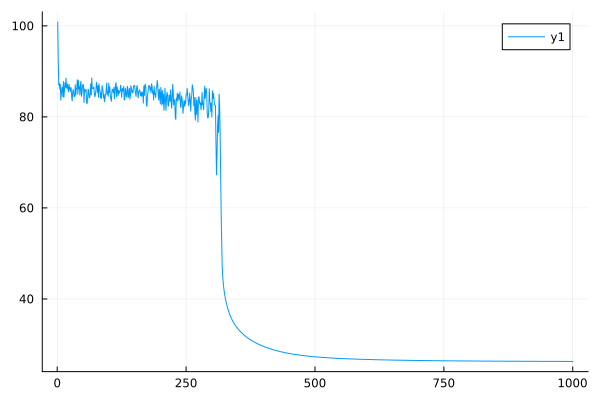

In [133]:
q, ll = fitquantum(32,data; η=1e-1,c=0.995)
plot(ll)

In [135]:
q32 = qsim(32, 100; η=1e-1,c=0.995)

MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit no

100-element Vector{Float64}:
 0.10369373933944884
 0.0904041335395189
 0.07494706424472601
 0.10638429502683773
 0.11244340316666789
 0.09187671736776108
 0.12140862142714481
 0.07168066227405986
 0.08306047048638258
 0.10564472313908153
 0.08828408420918207
 0.11457090459229204
 0.09727593329678039
 ⋮
 0.11822792987593125
 0.10679963335060967
 0.0910833962311574
 0.08188688310264078
 0.09981644724226263
 0.10335185954581147
 0.08960147251274089
 0.13429744780087888
 0.10690081676202527
 0.09002480070607953
 0.09143696542810109
 0.11325883218281668

In [136]:
c32 = csim(32,100)

100-element Vector{Float64}:
 0.00017041783368538046
 0.0001704160543282219
 0.00017041663152756026
 0.04469208426343508
 0.00017041565715216047
 0.00017041754714637684
 0.00017041628110264667
 0.00017041611106634428
 0.00017041516357123857
 0.0001704129433119439
 0.0001704171831776472
 0.00017041528923457736
 0.00017041784695839108
 ⋮
 0.038426402079840646
 0.04925193148869343
 0.026666666666666533
 0.0001704156460684668
 0.00017041768600499466
 0.00017041541936817367
 0.0001704152097801312
 0.00017041563597892739
 0.00017041434311739178
 0.00017041489471396654
 0.00017041534654941502
 0.00017041627473684886

In [137]:
max(c32...), median(c32)

(0.050884239463418135, 0.00017041633057917135)

In [138]:
max(q32...), median(q32)

(0.13429744780087888, 0.09782411566688833)

# memory 64

MPS: fit not converged


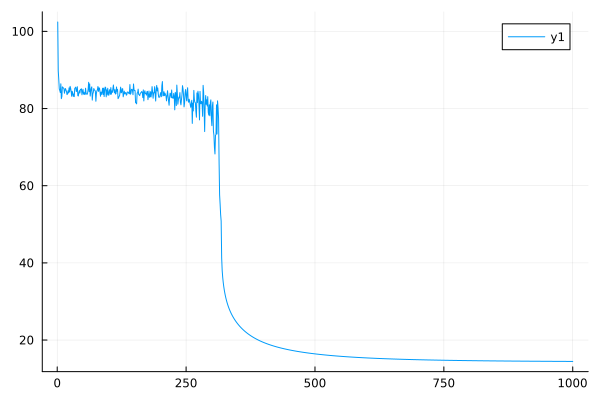

In [41]:
q, ll = fitquantum(64,data; η=1e-1,c=0.995)
plot(ll)

In [143]:
q64 = qsim(64, 100; η=1e-1,c=0.995)

MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit not converged
MPS: fit no

100-element Vector{Float64}:
 0.2826194277623875
 0.2101666246399862
 0.31436193423875025
 0.29345118081870525
 0.19292023311920659
 0.2600930256703336
 0.2574898932823397
 0.28221267259807586
 0.24442702662697624
 0.27202330519256007
 0.2574750389779346
 0.20718661848694364
 0.2550240789683771
 ⋮
 0.26457889468864165
 0.2623735985650969
 0.2736189454558057
 0.3060575078598889
 0.24861618069380478
 0.25460895750237955
 0.28167643652884206
 0.22897583862599818
 3.6985684468385276e-5
 0.2973888524995645
 0.19077950012496228
 0.24554862826867693

In [144]:
c64 = csim(64,100)

100-element Vector{Float64}:
 0.00017041354730240802
 0.00017041408188790257
 0.0001704142700331057
 0.00017041284447085514
 0.00017041329654269379
 0.0001704132598204127
 0.00017041341394289812
 0.00017041325626996056
 0.00017041329629754228
 0.00017041424799729387
 0.00017041340241123577
 0.0001704135589188271
 0.0001704135412953657
 ⋮
 0.00017041449689280056
 0.00017041356848890643
 0.00017041386114892553
 0.00017041256784107437
 0.00017041329233500078
 0.00017041294911635438
 0.0001704131775034679
 0.000170413849989462
 0.00017041315320695982
 0.00017041457664933475
 0.00017041440086609222
 0.00017041330200617878

In [145]:
max(c64...), median(c64)

(0.00017041506770589288, 0.00017041337446787398)

In [146]:
max(q64...), median(q64)

(0.32992325723045973, 0.26098177155393976)